In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import packages

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD

import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.ensemble import GradientBoostingClassifier # gradient boosting
from sklearn.svm import SVC # support vector machines
from sklearn import svm #support vector Machine
from sklearn.naive_bayes import GaussianNB #Naive bayes

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.svm import SVR
from sklearn.impute import KNNImputer
from sklearn.base import TransformerMixin
from fancyimpute import IterativeImputer

In [141]:
#STEP1 CREATE DATA FRAME
df1 = pd.read_csv("/content/drive/My Drive/CS5228/cs5228/train.csv")
df2 = pd.read_csv("/content/drive/My Drive/CS5228/cs5228/test.csv")

# df1 = df[df != ' ?']
# df1 = df1.dropna()
print(df1.shape)

# df3 = df2[df2 != ' ?']
# df3 = df3.dropna()
print(df2.shape)

(24421, 14)
(24421, 13)


In [142]:
# Find unique values of each feature

print('workclass',df1.workclass.unique())
print('education',df1.education.unique())
print('marital-status',df1['marital-status'].unique())
print('occupation',df1.occupation.unique())
print('relationship',df1.relationship.unique())
print('sex',df1.sex.unique())
print('native-country',df1['native-country'].unique())
print('exceeds50K',df1.exceeds50K.unique())

workclass [' ?' ' Private' ' State-gov' ' Self-emp-inc' ' Self-emp-not-inc'
 ' Local-gov' ' Federal-gov' ' Without-pay' ' Never-worked']
education [' Some-college' ' Bachelors' ' Assoc-voc' ' HS-grad' ' Assoc-acdm'
 ' Masters' ' 12th' ' Doctorate' ' 10th' ' 9th' ' Prof-school' ' 5th-6th'
 ' 11th' ' 7th-8th' ' 1st-4th' ' Preschool']
marital-status [' Never-married' ' Divorced' ' Married-civ-spouse' ' Widowed'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
occupation [' ?' ' Prof-specialty' ' Sales' ' Protective-serv' ' Craft-repair'
 ' Farming-fishing' ' Exec-managerial' ' Other-service' ' Adm-clerical'
 ' Transport-moving' ' Machine-op-inspct' ' Tech-support'
 ' Handlers-cleaners' ' Priv-house-serv' ' Armed-Forces']
relationship [' Own-child' ' Not-in-family' ' Husband' ' Unmarried' ' Other-relative'
 ' Wife']
sex [' Female' ' Male']
native-country [' United-States' ' Guatemala' ' Jamaica' ' ?' ' Germany' ' Japan'
 ' India' ' Italy' ' England' ' El-Salvador' ' Mexico' ' C

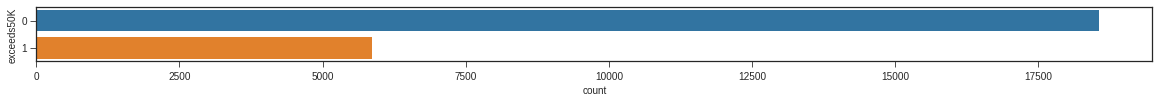

In [143]:
# Check Distribution of 'exceeds50K'

fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="exceeds50K", data=df1)

We observe that one class is much more likely than the other. Total distribution shows that 0 occurs almost 75% of the time, compared to 1 occuring only 25% of the time. We need to take this into account while training the classifier

In [0]:
#Preprocess
#df1
# Reduce classes of marital-status
df1['marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
df1['marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
df1['marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
df1['marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
df1['marital-status'].replace([' Separated'], 'NotMarried',inplace=True)
df1['marital-status'].replace([' Divorced'], 'Divorced',inplace=True)
df1['marital-status'].replace([' Widowed'], 'Married',inplace=True)

# Combine classes of workclass, because they both signify the same thing
df1['workclass'].replace(' Never-worked', ' Without-pay', inplace=True)

# Reduce classes of education-num based on education
df1['education-num'].replace(1, 1, inplace=True)
df1['education-num'].replace(2, 1, inplace=True)
df1['education-num'].replace(3, 1, inplace=True)
df1['education-num'].replace(4, 1, inplace=True)
df1['education-num'].replace(5, 1, inplace=True)
df1['education-num'].replace(6, 1, inplace=True)
df1['education-num'].replace(7, 1, inplace=True)
df1['education-num'].replace(8, 1, inplace=True)
df1['education-num'].replace(9, 2, inplace=True)
df1['education-num'].replace(10, 3, inplace=True)
df1['education-num'].replace(11, 3, inplace=True)
df1['education-num'].replace(12, 3, inplace=True)
df1['education-num'].replace(13, 4, inplace=True)
df1['education-num'].replace(14, 5, inplace=True)
df1['education-num'].replace(15, 5, inplace=True)
df1['education-num'].replace(16, 6, inplace=True)

# Reduce classes of education
df1['education'].replace(' Preschool', 'dropout', inplace=True)
df1['education'].replace(' 10th', 'dropout', inplace=True)
df1['education'].replace(' 11th', 'dropout', inplace=True)
df1['education'].replace(' 12th', 'dropout', inplace=True)
df1['education'].replace(' 1st-4th', 'dropout', inplace=True)
df1['education'].replace(' 5th-6th', 'dropout', inplace=True)
df1['education'].replace(' 7th-8th', 'dropout', inplace=True)
df1['education'].replace(' 9th', 'dropout', inplace=True)
df1['education'].replace(' HS-grad', 'HighGrad', inplace=True)
df1['education'].replace(' Some-college', 'CommunityCollege', inplace=True)
df1['education'].replace(' Assoc-acdm', 'CommunityCollege', inplace=True)
df1['education'].replace(' Assoc-voc', 'CommunityCollege', inplace=True)
df1['education'].replace(' Bachelors', 'Bachelors', inplace=True)
df1['education'].replace(' Masters', 'Masters', inplace=True)
df1['education'].replace(' Prof-school', 'Masters', inplace=True)
df1['education'].replace(' Doctorate', 'Doctorate', inplace=True)

#df2
# Reduce classes of marital-status
df2['marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
df2['marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
df2['marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
df2['marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
df2['marital-status'].replace([' Separated'], 'NotMarried',inplace=True)
df2['marital-status'].replace([' Divorced'], 'Divorced',inplace=True)
df2['marital-status'].replace([' Widowed'], 'Married',inplace=True)

# Combine classes of workclass, because they both signify the same thing
df2['workclass'].replace(' Never-worked', ' Without-pay', inplace=True)

# Reduce classes of education-num based on education
df2['education-num'].replace(1, 0, inplace=True)
df2['education-num'].replace(2, 0, inplace=True)
df2['education-num'].replace(3, 0, inplace=True)
df2['education-num'].replace(4, 0, inplace=True)
df2['education-num'].replace(5, 0, inplace=True)
df2['education-num'].replace(6, 0, inplace=True)
df2['education-num'].replace(7, 0, inplace=True)
df2['education-num'].replace(8, 0, inplace=True)
df2['education-num'].replace(9, 1, inplace=True)
df2['education-num'].replace(10, 2, inplace=True)
df2['education-num'].replace(11, 2, inplace=True)
df2['education-num'].replace(12, 2, inplace=True)
df2['education-num'].replace(13, 3, inplace=True)
df2['education-num'].replace(14, 4, inplace=True)
df2['education-num'].replace(15, 4, inplace=True)
df2['education-num'].replace(16, 5, inplace=True)

# Reduce classes of education
df2['education'].replace(' Preschool', 'dropout', inplace=True)
df2['education'].replace(' 10th', 'dropout', inplace=True)
df2['education'].replace(' 11th', 'dropout', inplace=True)
df2['education'].replace(' 12th', 'dropout', inplace=True)
df2['education'].replace(' 1st-4th', 'dropout', inplace=True)
df2['education'].replace(' 5th-6th', 'dropout', inplace=True)
df2['education'].replace(' 7th-8th', 'dropout', inplace=True)
df2['education'].replace(' 9th', 'dropout', inplace=True)
df2['education'].replace(' HS-grad', 'HighGrad', inplace=True)
df2['education'].replace(' Some-college', 'CommunityCollege', inplace=True)
df2['education'].replace(' Assoc-acdm', 'CommunityCollege', inplace=True)
df2['education'].replace(' Assoc-voc', 'CommunityCollege', inplace=True)
df2['education'].replace(' Bachelors', 'Bachelors', inplace=True)
df2['education'].replace(' Masters', 'Masters', inplace=True)
df2['education'].replace(' Prof-school', 'Masters', inplace=True)
df2['education'].replace(' Doctorate', 'Doctorate', inplace=True)

# Replace additional country present only in test data with its closest neighbour present in train data
# Encode all countries based on distribution shown below. Because almost 90% of data is only United States
def func(x):
    if x == ' United-States':
        return 'USA'
    elif x == ' Outlying-US(Guam-USVI-etc)':
        return 'USA'
    elif x == ' ?':
        return ' ?'
    else:
        return 'Other'

df1['native-country'] = df1['native-country'].apply(func)
df2['native-country'] = df2['native-country'].apply(func)

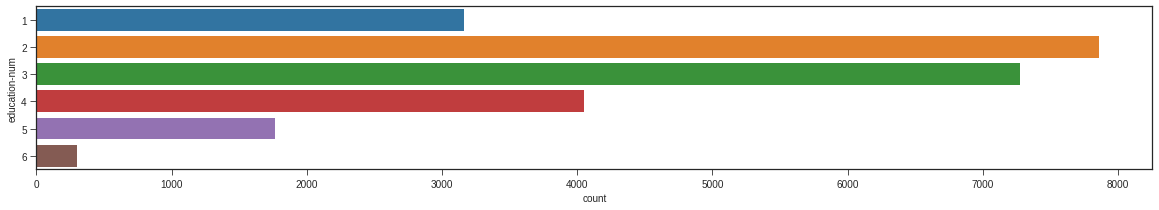

In [145]:
# Check Distribution of 'education-num'

fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education-num", data=df1)

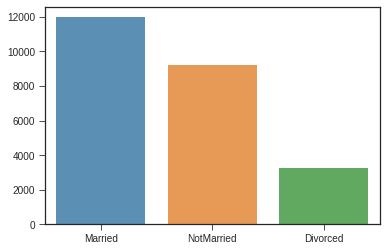

In [146]:
# Check Distribution of 'marital-status'

ms_count = df1['marital-status'].value_counts()
sns.barplot(ms_count.index, ms_count.values, alpha=0.8)
plt.show()

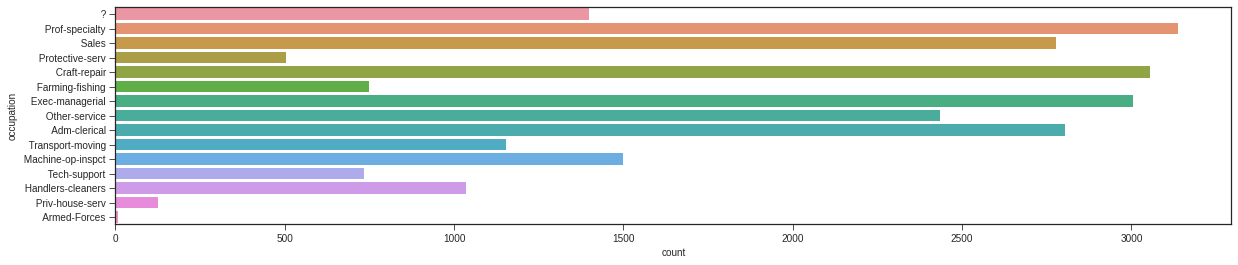

In [147]:
# Check Distribution of 'occupation'

plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=df1)

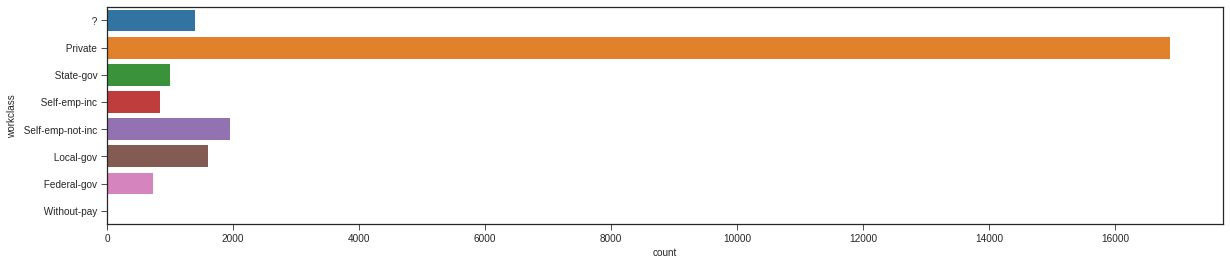

In [148]:
# Check Distribution of 'workclass'

plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="workclass", data=df1)

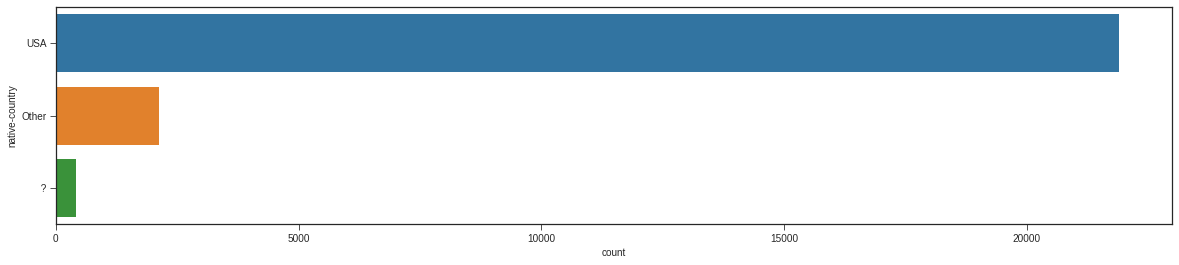

In [149]:
# Check Distribution of 'native-country'

plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="native-country", data=df1)

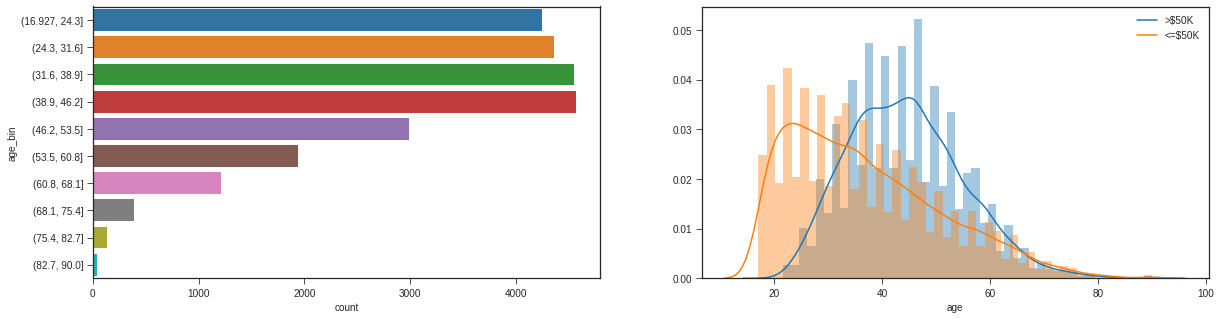

In [150]:
# Create bins for age, in order to visualise continuous data 
df1['age_bin'] = pd.cut(df1['age'], 10)

plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=df1)
plt.subplot(1, 2, 2)
sns.distplot(df1[df1['exceeds50K'] == 1]['age'], kde_kws={"label": ">$50K"})
sns.distplot(df1[df1['exceeds50K'] == 0]['age'], kde_kws={"label": "<=$50K"})

(20.0, 60.0)

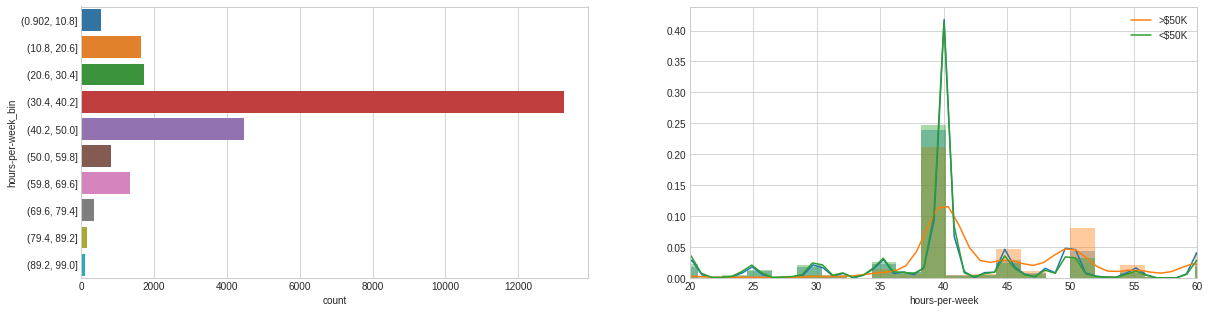

In [151]:
# Create bins for hours-per-week, in order to visualise continuous data 
df1['hours-per-week_bin'] = pd.cut(df1['hours-per-week'], 10)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=df1);
plt.subplot(1, 2, 2)
sns.distplot(df1['hours-per-week']);
sns.distplot(df1[df1['exceeds50K'] == 1]['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(df1[df1['exceeds50K'] == 0]['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

In [152]:
# Replace missing data with NaN, to enable imputing of data based on feature similarity
encoder = LabelEncoder()
imputer = IterativeImputer()
cat_cols = ['occupation','workclass','native-country','education','marital-status','sex','relationship']
# print(df1['occupation'].value_counts(dropna=False))
# print(df1['workclass'].value_counts(dropna=False))
# print(df1['marital-status'].value_counts(dropna=False))
# print(df1['sex'].value_counts(dropna=False))
# print(df1['relationship'].value_counts(dropna=False))
df1['occupation'] = df1['occupation'].replace(" ?", np.nan)
df1['workclass'] = df1['workclass'].replace(" ?", np.nan)
df1['native-country'] = df1['native-country'].replace(" ?", np.nan)

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

for columns in cat_cols:
    encode(df1[columns])
# print(df1['occupation'].value_counts(dropna=False))
# print(df1['workclass'].value_counts(dropna=False))
# print(df1['marital-status'].value_counts(dropna=False))
# print(df1['sex'].value_counts(dropna=False))
# print(df1['relationship'].value_counts(dropna=False))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [153]:
# Repeat same procedure for df2
cat_cols = ['occupation','workclass','native-country','education','marital-status','sex','relationship']
print(df2['occupation'].value_counts(dropna=False))
df2['occupation'] = df2['occupation'].replace(" ?", np.nan)
df2['workclass'] = df2['workclass'].replace(" ?", np.nan)
df2['native-country'] = df2['native-country'].replace(" ?", np.nan)
for columns in cat_cols:
    encode(df2[columns])

 Exec-managerial      3080
 Craft-repair         3056
 Prof-specialty       3034
 Adm-clerical         2806
 Sales                2728
 Other-service        2488
 Machine-op-inspct    1524
 ?                    1410
 Transport-moving     1202
 Handlers-cleaners    1038
 Farming-fishing       741
 Tech-support          713
 Protective-serv       479
 Priv-house-serv       115
 Armed-Forces            7
Name: occupation, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# Drop the additional bin columns, which we will not be using 
df1 = df1.drop('age_bin',1)
df1 = df1.drop('hours-per-week_bin',1)

In [155]:
# Imputing values for workclass, occupation and native-country based on Feature Similarity
#df1
df1 = pd.DataFrame(np.round(imputer.fit_transform(df1)),columns = df1.columns)
# print(df1['occupation'].value_counts(dropna=False))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [156]:
# Imputing values for workclass, occupation and native-country based on Feature Similarity
#df2
df2 = pd.DataFrame(np.round(imputer.fit_transform(df2)),columns = df2.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [157]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,exceeds50K
0,30.0,2.0,147215.0,1.0,3.0,2.0,6.0,3.0,0.0,0.0,0.0,30.0,1.0,0.0
1,60.0,2.0,173960.0,0.0,4.0,0.0,9.0,1.0,0.0,0.0,0.0,42.0,1.0,0.0
2,52.0,2.0,105428.0,1.0,3.0,1.0,6.0,0.0,1.0,0.0,0.0,12.0,1.0,0.0
3,37.0,2.0,112497.0,0.0,4.0,1.0,11.0,0.0,1.0,0.0,0.0,60.0,1.0,0.0
4,63.0,2.0,137843.0,1.0,3.0,1.0,11.0,0.0,1.0,7298.0,0.0,48.0,1.0,1.0


In [158]:
# Dropping 'fnlwgt' because it has negative correlation with 'exceeds50K'
df1 = df1.drop('fnlwgt',1)
# Dropping 'education' because it is highly correlated with 'education-num'
df1 = df1.drop('education',1)
# df1 = df1.drop('native-country',1)
print(df1.shape)

# Dropping 'fnlwgt' because it has negative correlation with 'exceeds50K'
df2 = df2.drop('fnlwgt',1)
# Dropping 'education' because it is highly correlated with 'education-num'
df2 = df2.drop('education',1)
# df2 = df2.drop('native-country',1)
print(df2.shape)

(24421, 12)
(24421, 11)


In [0]:
# Create New Cross-feature
# df1['age-hour'] = df1['age'] * df1['hours-per-week']
# df1 = df1.drop('age',1)
# df1 = df1.drop('hours-per-week',1)

# df2['age-hour'] = df2['age'] * df2['hours-per-week']
# df2 = df2.drop('age',1)
# df2 = df2.drop('hours-per-week',1)

In [0]:
# Standard Scaling
# scaler_standard = StandardScaler()
# df1['age'] = scaler_standard.fit_transform(df1['age'].values.reshape(-1,1))
# df1['hours-per-week'] = scaler_standard.fit_transform(df1['hours-per-week'].values.reshape(-1,1))

# df2['age'] = scaler_standard.fit_transform(df2['age'].values.reshape(-1,1))
# df2['hours-per-week'] = scaler_standard.fit_transform(df2['hours-per-week'].values.reshape(-1,1))

# Min Max Scaling
scaler = MinMaxScaler()
# df1['education-num'] = scaler.fit_transform(df1['education-num'].values.reshape(-1,1))
df1['hours-per-week'] = scaler.fit_transform(df1['hours-per-week'].values.reshape(-1,1))
df1['age'] = scaler.fit_transform(df1['age'].values.reshape(-1,1))
# df1['age-hour'] = scaler.fit_transform(df1['age-hour'].values.reshape(-1,1))
df1['capital-gain'] = scaler.fit_transform(df1['capital-gain'].values.reshape(-1,1))
df1['capital-loss'] = scaler.fit_transform(df1['capital-loss'].values.reshape(-1,1))

# df2['education-num'] = scaler.fit_transform(df2['education-num'].values.reshape(-1,1))
df2['hours-per-week'] = scaler.fit_transform(df2['hours-per-week'].values.reshape(-1,1))
df2['age'] = scaler.fit_transform(df2['age'].values.reshape(-1,1))
# df2['age-hour'] = scaler.fit_transform(df2['age-hour'].values.reshape(-1,1))
df2['capital-gain'] = scaler.fit_transform(df2['capital-gain'].values.reshape(-1,1))
df2['capital-loss'] = scaler.fit_transform(df2['capital-loss'].values.reshape(-1,1))

In [160]:
#STEP6 One Hot Encoding
features_to_encode = ['marital-status', 'occupation', 'relationship', 'sex', 'workclass', 'native-country']

df1 = pd.get_dummies(df1, columns=features_to_encode, drop_first=False)
df2 = pd.get_dummies(df2, columns=features_to_encode, drop_first=False)
print(df1.shape)
print(df2.shape)

(24421, 40)
(24421, 39)


In [161]:
df1.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,exceeds50K,marital-status_0.0,marital-status_1.0,marital-status_2.0,occupation_0.0,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,occupation_8.0,occupation_9.0,occupation_10.0,occupation_11.0,occupation_12.0,occupation_13.0,relationship_0.0,relationship_1.0,relationship_2.0,relationship_3.0,relationship_4.0,relationship_5.0,sex_0.0,sex_1.0,workclass_0.0,workclass_1.0,workclass_2.0,workclass_3.0,workclass_4.0,workclass_5.0,workclass_6.0,native-country_0.0,native-country_1.0
0,0.178082,3.0,0.000000,0.0,0.295918,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0.589041,4.0,0.000000,0.0,0.418367,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,0.479452,3.0,0.000000,0.0,0.112245,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0.273973,4.0,0.000000,0.0,0.602041,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0.630137,3.0,0.072981,0.0,0.479592,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [162]:
df2.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0.0,marital-status_1.0,marital-status_2.0,occupation_0.0,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,occupation_8.0,occupation_9.0,occupation_10.0,occupation_11.0,occupation_12.0,occupation_13.0,relationship_0.0,relationship_1.0,relationship_2.0,relationship_3.0,relationship_4.0,relationship_5.0,sex_0.0,sex_1.0,workclass_0.0,workclass_1.0,workclass_2.0,workclass_3.0,workclass_4.0,workclass_5.0,workclass_6.0,native-country_0.0,native-country_1.0
0,0.082192,2.0,0.00000,0.0,0.244898,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0.712329,1.0,0.02538,0.0,0.397959,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
2,0.136986,3.0,0.00000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,0.315068,2.0,0.00000,0.0,0.397959,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
4,0.095890,0.0,0.00000,0.0,0.397959,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [163]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 24421 non-null  float64
 1   education-num       24421 non-null  float64
 2   capital-gain        24421 non-null  float64
 3   capital-loss        24421 non-null  float64
 4   hours-per-week      24421 non-null  float64
 5   exceeds50K          24421 non-null  float64
 6   marital-status_0.0  24421 non-null  uint8  
 7   marital-status_1.0  24421 non-null  uint8  
 8   marital-status_2.0  24421 non-null  uint8  
 9   occupation_0.0      24421 non-null  uint8  
 10  occupation_1.0      24421 non-null  uint8  
 11  occupation_2.0      24421 non-null  uint8  
 12  occupation_3.0      24421 non-null  uint8  
 13  occupation_4.0      24421 non-null  uint8  
 14  occupation_5.0      24421 non-null  uint8  
 15  occupation_6.0      24421 non-null  uint8  
 16  occu

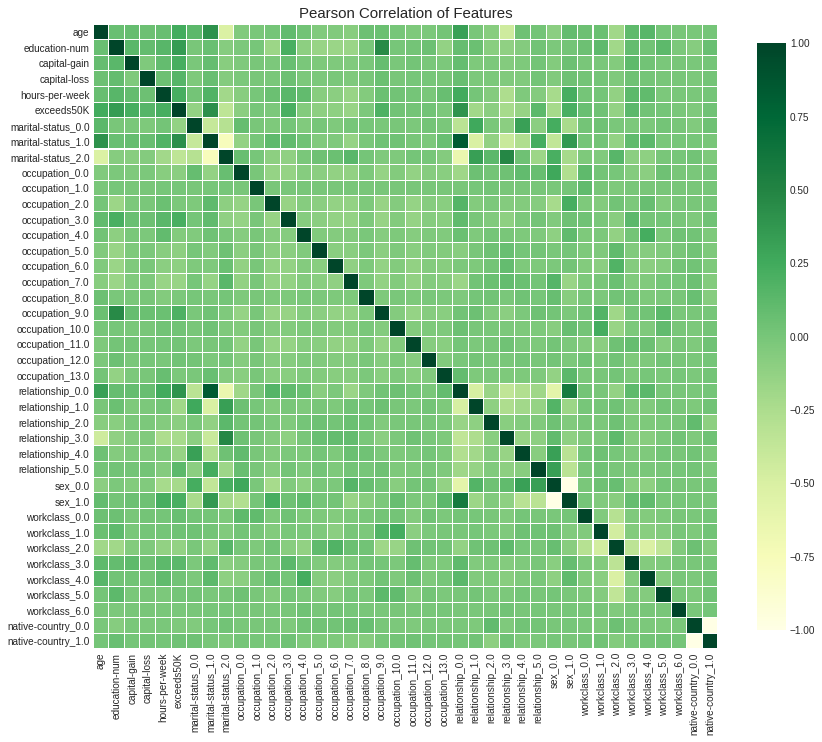

In [164]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        # annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white'
        # annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df1)

In [165]:
#STEP9 Making X and y
y = df1["exceeds50K"]
X = df1.drop("exceeds50K", axis=1)
print(X.shape)
X.head()

(24421, 39)


,age,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0.0,marital-status_1.0,marital-status_2.0,occupation_0.0,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,occupation_8.0,occupation_9.0,occupation_10.0,occupation_11.0,occupation_12.0,occupation_13.0,relationship_0.0,relationship_1.0,relationship_2.0,relationship_3.0,relationship_4.0,relationship_5.0,sex_0.0,sex_1.0,workclass_0.0,workclass_1.0,workclass_2.0,workclass_3.0,workclass_4.0,workclass_5.0,workclass_6.0,native-country_0.0,native-country_1.0
0,0.178082,3.0,0.000000,0.0,0.295918,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0.589041,4.0,0.000000,0.0,0.418367,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,0.479452,3.0,0.000000,0.0,0.112245,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0.273973,4.0,0.000000,0.0,0.602041,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0.630137,3.0,0.072981,0.0,0.479592,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [0]:
#STEP10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [167]:
print(X.shape)
print(df2.shape)

(24421, 39)
(24421, 39)


In [168]:
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0.0,marital-status_1.0,marital-status_2.0,occupation_0.0,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,occupation_8.0,occupation_9.0,occupation_10.0,occupation_11.0,occupation_12.0,occupation_13.0,relationship_0.0,relationship_1.0,relationship_2.0,relationship_3.0,relationship_4.0,relationship_5.0,sex_0.0,sex_1.0,workclass_0.0,workclass_1.0,workclass_2.0,workclass_3.0,workclass_4.0,workclass_5.0,workclass_6.0,native-country_0.0,native-country_1.0
0,0.178082,3.0,0.000000,0.0,0.295918,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0.589041,4.0,0.000000,0.0,0.418367,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,0.479452,3.0,0.000000,0.0,0.112245,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0.273973,4.0,0.000000,0.0,0.602041,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0.630137,3.0,0.072981,0.0,0.479592,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [169]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8390883035348711


In [170]:
#STEP13
# Gradient Boosting
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
# y_pred = gbc.predict(x_test1)
score_gbc = gbc.score(X_test,y_test)
print('The accuracy of the GBC Model is',score_gbc)

The accuracy of the GBC Model is 0.8639279377644329


In [172]:
# Hyper Parameter Tuning
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[10,50,100,250,500,750,1000,1500]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier()#max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            ,param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'learning_rate': 0.05, 'n_estimators': 1000}, 0.8720017607179512)

In [173]:
# Hyper Parameter Tuning 2
p_test2 = {'max_depth':[2,3,4,5,6,7], 'min_samples_split':[5,10,20,40,60,80,100,150,200]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,n_estimators=1000)#, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            ,param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 3, 'min_samples_split': 100}, 0.8728793129503304)

In [174]:
# Hyper Parameter Tuning 3
p_test4 = {'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000, max_depth=3, min_samples_split=100), 
            param_grid = p_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'min_samples_leaf': 7}, 0.8729962891089291)

In [175]:
# Hyper Parameter Tuning 4
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000, max_depth=3, min_samples_split=100, min_samples_leaf=7), 
param_grid = p_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_features': 5}, 0.8704808139418467)

In [176]:
newGbc = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000, max_depth=3, min_samples_split=100)
newGbc.fit(X_train, y_train)
score_gbc = newGbc.score(X_test,y_test)
print('The accuracy of the GBC Model is',score_gbc)

The accuracy of the GBC Model is 0.8710249761157364


In [180]:
print("Precision - ", precision_score(y_test, newGbc.predict(X_test)))
print("Recall - ", recall_score(y_test, newGbc.predict(X_test)))
print("F-score - ", f1_score(y_test, newGbc.predict(X_test)))
print("ROC-AUC score - ", roc_auc_score(y_test, newGbc.predict(X_test)))

Precision -  0.7770961145194274
Recall -  0.6484641638225256
F-score -  0.7069767441860465
ROC-AUC score -  0.7948731305735002


In [178]:
#STEP14
# newGbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=4)
# newGbc.fit(X_train, y_train)
# y_pred = gbc.predict(x_test1)
# new_score_gbc = gbc.score(X_test,y_test)
# print('The accuracy of the Tuned GBC Model is', new_score_gbc)
test_pred = newGbc.predict(df2)
print(test_pred)
print(type(test_pred))
print(test_pred.shape)

[0. 0. 0. ... 0. 0. 0.]
<class 'numpy.ndarray'>
(24421,)


In [179]:
#STEP15
index = [i for i in range(1,len(test_pred)+1)]
test_pred = np.array(test_pred, dtype=np.int32)
index = np.array(index, dtype=np.int32)
test_pred = np.stack((index.astype('int'), test_pred.astype('int')), axis=1)
print(test_pred)
print(type(test_pred))
print(test_pred.shape)
data = pd.DataFrame(data=test_pred, columns=['id','prediction'])
data.to_csv('/content/drive/My Drive/CS5228/FinalSub.csv', index=False,)

[[    1     0]
 [    2     0]
 [    3     0]
 ...
 [24419     0]
 [24420     0]
 [24421     0]]
<class 'numpy.ndarray'>
(24421, 2)
